In [65]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy as sp
from scipy import stats
movies = pd.read_csv("fandango_score_comparison.csv")
movies.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5


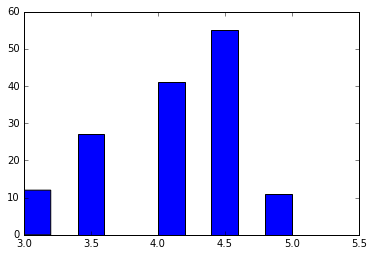

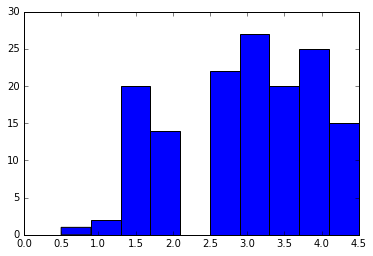

In [66]:
plt.hist(movies["Fandango_Stars"])
plt.show()
plt.hist(movies["Metacritic_norm_round"])
plt.show()

The Metacritic score seems to have a negative skew, and many more reviewers gave higher scores compared to Fandango

In [67]:
fandango_stars_mean = sum(movies["Fandango_Stars"]) / len(movies["Fandango_Stars"])
str(round(fandango_stars_mean, 2))

'4.09'

In [68]:
metacritic_norm_round_mean = sum(movies["Metacritic_norm_round"]) / len(movies["Metacritic_norm_round"])
str(round(metacritic_norm_round_mean, 2))

'2.97'

In [69]:
fandango_median = np.median(movies["Fandango_Stars"])
print(fandango_median)

4.0


In [70]:
meta_median = numpy.median(movies["Metacritic_norm_round"])
print(meta_median)

3.0


In [71]:
fandango_std = np.std(movies["Fandango_Stars"])
str(round(fandango_std, 2))

'0.54'

In [72]:
meta_std = numpy.std(movies["Metacritic_norm_round"])
str(round(meta_std, 2))

'0.99'

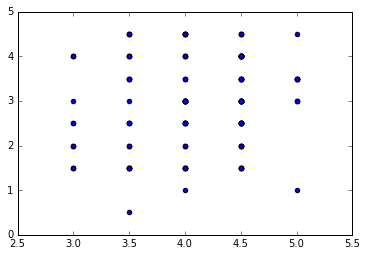

In [73]:
plt.scatter(movies["Fandango_Stars"], movies["Metacritic_norm_round"])

In [74]:
fm_diff = movies["Fandango_Stars"] - movies["Metacritic_norm_round"]
fm_diff.head(3)

0    1.5
1    1.5
2    2.0
dtype: float64

In [75]:
fm_diff.abs().head(3)

0    1.5
1    1.5
2    2.0
dtype: float64

In [76]:
fm_diff.sort(ascending = False)
print(fm_diff.head(3))

3      4.0
15     3.0
134    3.0
dtype: float64


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  if __name__ == '__main__':


In [82]:
x = movies["Fandango_Stars"]
y = movies["Metacritic_norm_round"]

r_value = sp.stats.pearsonr(x,y)
r_value

(0.17844919073895918, 0.031161516228523815)

In [84]:
linear_reg = sp.stats.linregress(x,y)
linear_reg

LinregressResult(slope=0.32724037528307959, intercept=1.6345033969589142, rvalue=0.17844919073895882, pvalue=0.031161516228524384, stderr=0.15036394045133955)

In [92]:
slope=0.32724037528307959
intercept=1.6345033969589142

pred_3 = 3 * slope + intercept
str(round(pred_3, 2))

'2.62'

In [95]:
pred_1 = 1 * slope + intercept
str(round(pred_1, 2))

'1.96'

In [96]:
pred_5 = 5 * slope + intercept
str(round(pred_5, 2))

'3.27'

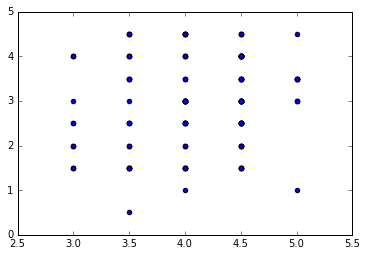

In [97]:
plt.scatter(x,y)

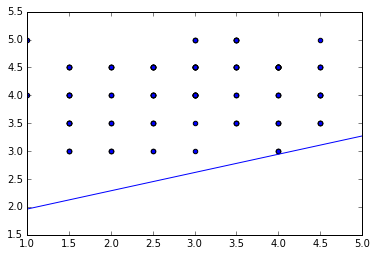

In [98]:
pred_1 = 1 * slope + intercept
pred_5 = 5 * slope + intercept
plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
plt.plot([1,5],[pred_1,pred_5])
plt.xlim(1,5)
plt.show()